### **Imports Made**:
- Numpy for general purpose tasks (ex: file loads, matrix operations and arrangements, etc)
- sklearn.linear_model for the multiple models tested
- sklearn.mixture for Gaussian Mixture Model
- data_spliter for splitting the data into training and testing sets
- matplotlib.pyplot for plotting the data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from sklearn.metrics import balanced_accuracy_score

In [8]:
X_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_project = np.load("Xtest_Classification1.npy")
X_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

print(X_train.shape,y_train.shape,x_project.shape,X_test.shape,y_test.shape)

(6449, 28, 28, 3) (6449, 2) (1764, 2352) (1251, 28, 28, 3) (1251, 2)


Epoch 1/1000
101/101 [==============================] - 4s 32ms/step - loss: 0.5669 - accuracy: 0.6658 - val_loss: 0.4899 - val_accuracy: 0.7626
Epoch 2/1000
101/101 [==============================] - 3s 30ms/step - loss: 0.5005 - accuracy: 0.7072 - val_loss: 0.4186 - val_accuracy: 0.7642
Epoch 3/1000
101/101 [==============================] - 3s 29ms/step - loss: 0.4827 - accuracy: 0.7218 - val_loss: 0.4047 - val_accuracy: 0.7882
Epoch 4/1000
101/101 [==============================] - 3s 30ms/step - loss: 0.4627 - accuracy: 0.7393 - val_loss: 0.3857 - val_accuracy: 0.7674
Epoch 5/1000
101/101 [==============================] - 3s 29ms/step - loss: 0.4576 - accuracy: 0.7491 - val_loss: 0.4006 - val_accuracy: 0.7386
Epoch 6/1000
101/101 [==============================] - 3s 30ms/step - loss: 0.4507 - accuracy: 0.7528 - val_loss: 0.3696 - val_accuracy: 0.8145
Epoch 7/1000
101/101 [==============================] - 3s 29ms/step - loss: 0.4448 - accuracy: 0.7535 - val_loss: 0.3790 - val_ac

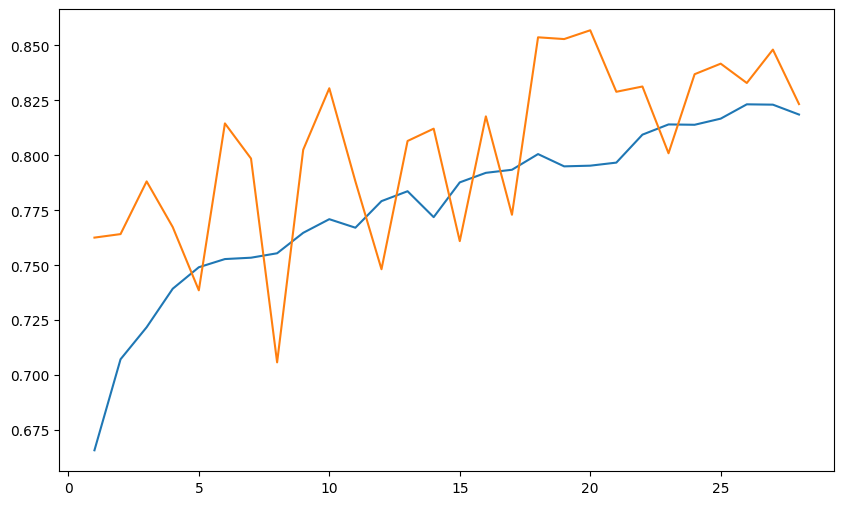

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(2, activation='softmax'),
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose = 3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test) ,callbacks=[early_stopping])

# Extract accuracy values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


In [10]:
y_predi = model.predict(X_test)

for i in y_predi:
    if i[0]>i[1]:
        i[0]=1
        i[1]=0
    else:
        i[0]=0
        i[1]=1
        
print(y_predi[:,0])
balanced_accuracy = balanced_accuracy_score(y_test, y_predi)
print("Balanced Accuracy Score:", balanced_accuracy)

40/40 [==============================] - 0s 4ms/step
[1. 1. 1. ... 1. 1. 1.]


ValueError: multilabel-indicator is not supported

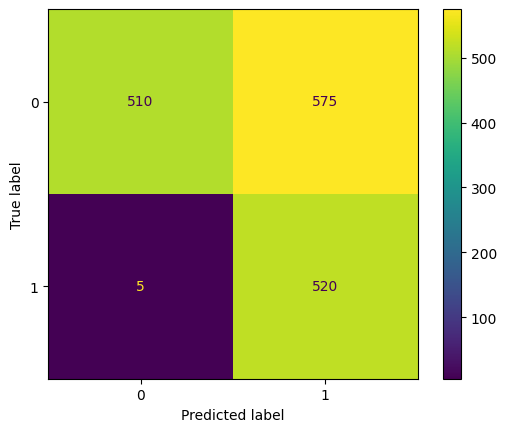

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_predi[:,0],y_test[:,0])
cm_display=ConfusionMatrixDisplay(cm).plot()